## Observations and Insights 

In [199]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse = "mouse.csv"
study = "study.csv"

# Read the mouse data and the study results
mouse = pd.read_csv(mouse)
study = pd.read_csv(study)

# Combine the data into a single dataset
data_df = pd.merge(mouse, study, on="Mouse ID", how="left")

#Dropping any unknown values from the data set 
data_df = data_df.dropna(how='any')

# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [200]:
#Printing a statistical overview of the data set 
data_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [201]:
# Checking the number of mice.
mouse_count = data_df['Mouse ID'].count()
#Creating a bin for the mouse count 
mouse_bin = {'Mouse Count':[mouse_count]}

#Creating a dataframe for the count 
mouse_bin = pd.DataFrame(mouse_bin)

#Displaying the dataframe
mouse_bin 

,Mouse Count
0,1893


In [202]:
# Getting the duplicate mice by ID number that shows up for Mouse ID Timepoint. 
unique_mice = data_df[data_df.duplicated(["Mouse ID","Timepoint"])]

unique_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [203]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = data_df.drop_duplicates(['Mouse ID','Timepoint'],keep='last').sort_index()

#Displaying the dat frame 
clean_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [204]:
# Checking the number of mice in the clean DataFrame.
clean_count = clean_data_df['Mouse ID'].count()

#Binning and Renaming the columns in the DataFrame 
clean_count_bin = {'Mouse Count':[clean_count]}

#Creating the DataFrame
clean_count_bin = pd.DataFrame(clean_count_bin)

#Displaying the DataFrame 
clean_count_bin

,Mouse Count
0,1888



## Summary Statistics

In [205]:
#Calulating the Standard Error Mean for Tumor Volume for each Drug Regimen
sem_data = clean_data_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()

#Setting a variable equal to the calculated SEM
sem_summary = sem_data

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_table = clean_data_df.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)":
                                                          [np.mean, 
                                                           np.median, 
                                                           np.var, 
                                                           np.std,
                                                          ]
                                                         })

#Creating a dataframe 
stat_table = pd.DataFrame(stat_table)

#Adding SEM Column into the Summary Statistics table
stat_table['SEM of Tumor Volume (mm3)'] = sem_summary

#Dropping a level of the multi-index that was created from the agg function
stat_table.columns = stat_table.columns.droplevel()

#Renaming my column headers to give the data the correct labels
stat_table = stat_table.rename(columns={"mean":"Mean",
                                       "median":"Median",
                                       "var":"Variance",
                                       "std":"Std. Deviation",
                                       "":"SEM"})


#Adding a comment to give the table a Name 
stat_table.style.set_caption("TUMOR VOLUME (MM3) SUMMARY STATISTICS")

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

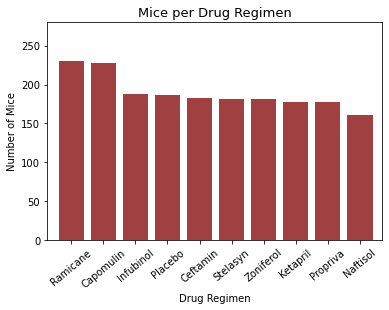

<Figure size 432x288 with 0 Axes>

In [206]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#Grabbing a count of mice from the cleaned up dataframe without duplicates 
mouse_count = data_df['Drug Regimen'].value_counts()

#unique strings for drug regimen 
drug_reg = data_df['Drug Regimen'].unique()

#Sets the x-axis labels to the unique drug regimen names listed in the data set 
x_axis = np.arange(0, len(drug_reg))

#empty that will hold the x-axis tick locations 
tick_locations = [] 

#for loop that will store each unique drug regiment on the x-axis 
for x in x_axis: 
    tick_locations.append(x)

#giving title/labels to the bar grap using pyplot 
plt.title("Mice per Drug Regimen",fontsize=13,fontweight='light')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

#Setting the x limits of the bar graph
plt.xlim(-.75, len(drug_reg)-.30)

#counter space for our y-axis 
plt.ylim(0, max(mouse_count)+50)

#styling the graph 
plt.bar(x_axis, mouse_count,facecolor="maroon",alpha=0.75, align="center")


#assigning tick values generated from our for loop 
plt.xticks(tick_locations,drug_reg, fontsize=10,rotation=40,horizontalalignment="center")

#showing the graph 
plt.show()

plt.savefig('Barp_Matplot.png')



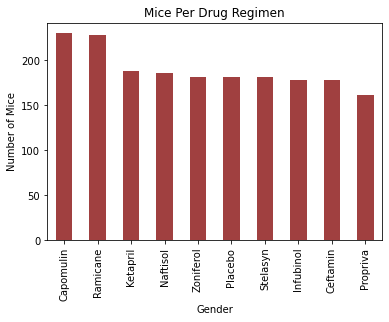

<Figure size 432x288 with 0 Axes>

In [207]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#Using the data generated from the previous cell
panda_bar_chart = mouse_count.plot(kind="bar",color="maroon",alpha=0.75,title="Mice Per Drug Regimen")

#labeling my x axis 
panda_bar_chart.set_xlabel("Gender")

#labeling my y axis 
panda_bar_chart.set_ylabel("Number of Mice")

#showing my graph 
plt.show()

plt.savefig('Barp_Pandas.png')

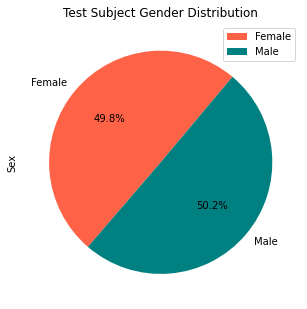

In [208]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groups = mouse.groupby('Sex')

#Putting the gender count into a dataFrame 
gender_count = pd.DataFrame(gender_groups['Sex'].count())

#Giving colors to female and male groups 
#female = tomato
#male = teal 
colors = ["tomato","teal"]

#Creating and displaying our pie chart 
pie_chart = gender_count.plot.pie(y="Sex",colors=colors,title="Test Subject Gender Distribution",autopct='%1.1f%%', figsize=(5,8),
                                 shadow=False,startangle=50
                                )

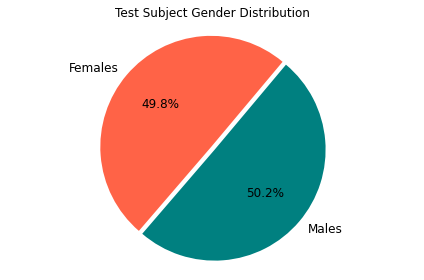

<Figure size 432x288 with 0 Axes>

In [209]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt_labels = ["Females","Males"]

#Since we know the count we can avoid an error message by manually entering the count
#and enter an array ourselves 
plt_gender = [124,125]

#Setting my pie chart colors 
colors = ["tomato","teal"]

#Telling matplotlib to separate female from male group 
explode = (0.02,0)

#Creating the pie chart 
plt.pie(plt_gender,explode=explode, labels=plt_labels, colors=colors, autopct="%1.1f%%",shadow=False,startangle=50,radius=.5,
       textprops={'size':'larger'})

#adding title 
plt.title("Test Subject Gender Distribution")

#Telling matplot lib that we want a pie chart with equal axes 
plt.axis("equal")

#Resizing the plot to display labels 
plt.tight_layout()

#Displaying our pie chart 
plt.show()

#Saving the figure as a png file 
plt.savefig("MousePyPlot.png")

## Quartiles, Outliers and Boxplots

In [210]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 

# Capomulin, Ramicane, Infubinol, and Ceftamin

#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement
tumor_group = clean_data_df.groupby(['Mouse ID','Drug Regimen']).max()['Timepoint']

tumor_group = pd.DataFrame(tumor_group)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_df = pd.merge(tumor_group,data_df, on=("Mouse ID", "Timepoint"), how="left")

tumor_vol_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [263]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = tumor_vol_df.groupby(['Mouse ID'])['Drug Regimen'].unique()

treat_list = [] 

for drug in treatments: 
    treat_list.append(drug)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = tumor_vol_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].unique()

tumor_list = [] 

#Running a for loop to append the Tumor Volumes into our tumor list 
for tumor in tumor_vol: 
    tumor_list.append(tumor)
    
tumor_list.sort()
    


# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds



In [264]:
#Since the data is in a Dataframe we are able to use pandas to give quartile calculations 

#Quartiles are useful when we need to identify outlier data, and to help us understand the basic distribution of the data

#Quartiles divide the our data set into 4 groups 

#First quartile or Lower quartile 


#Third quartile or Upper Quartile 


In [265]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [267]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Isolating the Drug Regiment Capomulin so that I can find a mouse ID associated with the drug 
cap_data = clean_data_df.loc[clean_data_df['Drug Regimen']=="Capomulin"]

#Displaying the results 
cap_data = pd.DataFrame(cap_data)

cap_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [269]:
mouse_cap_data = cap_data.loc[cap_data['Mouse ID']=="s185"]

mouse_cap_data = mouse_cap_data.drop(['Sex','Age_months','Weight (g)','Metastatic Sites'],axis=1)

mouse_cap_data 

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
10,s185,Capomulin,0,45.000000
11,s185,Capomulin,5,43.878496
12,s185,Capomulin,10,37.614948
13,s185,Capomulin,15,38.177232
14,s185,Capomulin,20,36.866876
15,s185,Capomulin,25,33.949940
16,s185,Capomulin,30,32.959671
17,s185,Capomulin,35,28.328531
18,s185,Capomulin,40,25.472143
19,s185,Capomulin,45,23.343598


In [ ]:
timepoint_list = [] 

tumor_vol_list = [] 

for x in 

#Dropping columns and only keeping the timepoint and Tumor Volume (mm3) in the Data Frame 
cap_data = cap_data.drop(['Mouse ID','Sex','Age_months','Weight (g)','Metastatic Sites'],axis=1)

cap_data = cap_data.sort_values(by=['Timepoint'],ascending=False)



In [155]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


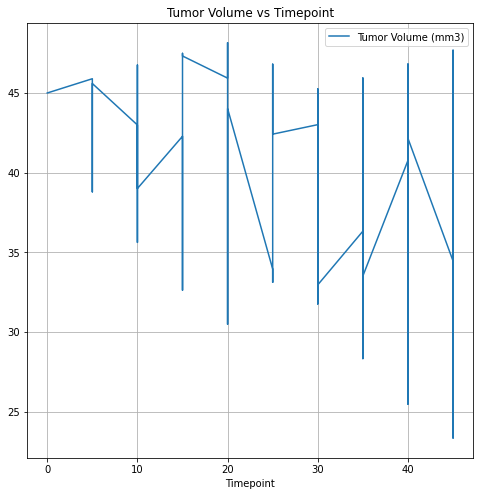

In [186]:
#Converting Timpepoint column into a numeric so the data can be used 
cap_data['Timepoint'] = pd.to_numeric(cap_data['Timepoint'])

#Generating a line plot of tumore volume vs. time point for a mouse treated with Capomulin 
cap_data.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
             title="Tumor Volume vs Timepoint")

plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen
